# Gradient Descent

**Team ID** : **1조**

- Write and run the code below (including Quiz) in jupyter notebook
- After completion, rename the file, and summit the file to e-class
- Submit file name : **“ML01\_<#조\>.ipynb”**, send me <mkpark@hufs.ac.kr>
  - Ex) ML01\_#조\.ipynb
- Due : **내일 11:59pm**

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 1. Perceptron

## Load Iris dataset

- Iris dataset  
 0 - sepal length in cm  
 1 - sepal width in cm  
 2 - petal length in cm  
 3 - petal width in cm  
 4 - class:  
    - Iris Setosa  
    - Iris Versicolour  
    - Iris Virginica 

In [31]:
import pandas as pd
df = pd.read_csv('iris.csv', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
#각각 50개씩 있음을 확인
df[4].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: 4, dtype: int64

In [33]:
condition = df[4]!='Iris-virginica'
df = df[condition]

### Preprocessing for training data

In [34]:
# make y for 100 data instances (setosa and versicolor)
y= df[4].to_numpy()
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [35]:
#  change the labels (Iris-setosa = -1, Other = 1)

y=df[4].replace({'Iris-setosa': -1, 'Iris-versicolor':1}, inplace=True)
y= df[4].to_numpy()
y


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [36]:
# extract sepal length and petal length

X = df[[0,2]].to_numpy()
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

### Plotting the data

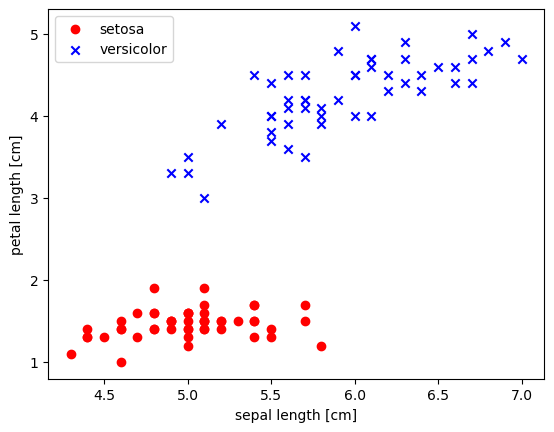

In [37]:
# plotting data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### Define Perceptron Class

In [45]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta # learning rate
        self.n_iter = n_iter # number of iteration
        self.random_state = random_state # random generator seed for random weight

        # weight initiailization
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        
    def fit(self, X, y):
        self.errors_ = []        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):

                ####################################################
                # wj = wj +  eta * (y - yhat) * xj
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                
                errors += int(update != 0.0)
                ####################################################
            self.errors_.append(errors)
            print(self.w_)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]  
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1) 

### Training a perceptron model
- Training Perceptron with learning rate 0.1
- Plotting the number of error graph
- Visualizing the model using given decision regions function

In [46]:
X.shape

(100, 2)

In [47]:
y.shape

(100,)

[0.03624345 0.13388244 0.08871828]
[0.01624345 0.07388244 0.12671828]
[-0.00375655  0.01988244  0.16271828]
[-0.00375655  0.03188244  0.20471828]
[-0.02375655 -0.07011756  0.17671828]
[-0.02375655 -0.07011756  0.17671828]
[-0.02375655 -0.07011756  0.17671828]
[-0.02375655 -0.07011756  0.17671828]
[-0.02375655 -0.07011756  0.17671828]
[-0.02375655 -0.07011756  0.17671828]


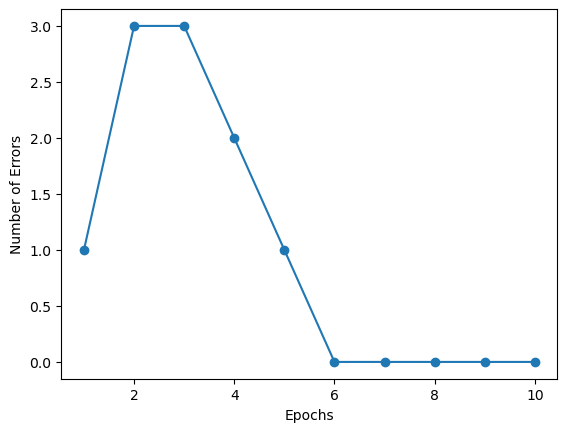

In [48]:
# Training Perceptron
model = Perceptron(eta=0.01, n_iter=10, random_state=1)

model.fit(X,y)

# Plotting the number of errors
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Errors')
plt.show()

In [49]:
model.predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [50]:
# A function for plotting decision regions
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

C:\Users\pc\AppData\Local\Temp\ipykernel_25524\53306269.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


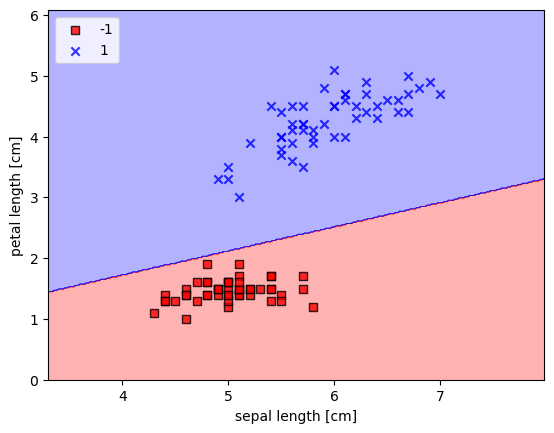

In [51]:
plot_decision_regions(X, y, classifier=model)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# 2. Adaline : Adaptive Linear Neurons

### Define Adaline Class

In [52]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta   # learning rate
        self.n_iter = n_iter  # number of iteration
        self.random_state = random_state
        
        # weight initiailization
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        
    def fit(self, X, y):
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            
            ####################################################
            # w = w + eta * (X.T dot errors)
            errors = (y-output)
            self.w_[1:] += self.eta*X.T.dot(errors)
            self.w_[0]  += self.eta*errors.sum()

            # compute cost 
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
            ####################################################
            print(self.w_)
            
        return self
    
    def net_input(self, X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X))>= 0.0,1,-1)

### Standardize features

In [53]:
# standardizing features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std

array([[-0.5810659 , -1.01435952],
       [-0.89430898, -1.01435952],
       [-1.20755205, -1.08374115],
       [-1.36417359, -0.94497788],
       [-0.73768744, -1.01435952],
       [-0.11120129, -0.80621461],
       [-1.36417359, -1.01435952],
       [-0.73768744, -0.94497788],
       [-1.67741667, -1.01435952],
       [-0.89430898, -0.94497788],
       [-0.11120129, -0.94497788],
       [-1.05093052, -0.87559625],
       [-1.05093052, -1.01435952],
       [-1.8340382 , -1.22250442],
       [ 0.51528486, -1.15312279],
       [ 0.35866332, -0.94497788],
       [-0.11120129, -1.08374115],
       [-0.5810659 , -1.01435952],
       [ 0.35866332, -0.80621461],
       [-0.5810659 , -0.94497788],
       [-0.11120129, -0.80621461],
       [-0.5810659 , -0.94497788],
       [-1.36417359, -1.29188606],
       [-0.5810659 , -0.80621461],
       [-1.05093052, -0.66745134],
       [-0.73768744, -0.87559625],
       [-0.73768744, -0.87559625],
       [-0.42444437, -0.94497788],
       [-0.42444437,

### Training an Adaline model on the iris dataset
- Training AdalineGD with learning rate 0.1, 0.0001, and 0.01
- Plotting the cost graph
- Visualizing the model using given decision regions function
- Computing the accuracy of the model

In [54]:
X_std.shape

(100, 2)

In [55]:
y.shape

(100,)

In [56]:
# Training AdalineGD with learning rate 0.1
ada1 = AdalineGD(n_iter=10, eta=0.1)
ada1.fit(X_std, y)

[-0.14619108  7.38086767  9.79678659]
[   1.31571974 -138.73294518 -138.43289951]
[ -11.8414777  2380.49335345 2382.64713229]
[   106.57329931 -40773.52560914 -40772.99590048]
[  -959.15969379 698204.43463095 698206.38720024]
[ 8.63243724e+03 -1.19559860e+07 -1.19559853e+07]
[-7.76919352e+04  2.04733017e+08  2.04733018e+08]
[ 6.99227417e+05 -3.50582610e+09 -3.50582610e+09]
[-6.29304675e+06  6.00333881e+10  6.00333881e+10]
[ 5.66374208e+07 -1.02800526e+12 -1.02800526e+12]


In [57]:
# Training AdalineGD with learning rate 0.0001
ada2 = AdalineGD(n_iter=10, eta=0.0001)
ada2.fit(X_std, y)

[0.01608102 0.00126942 0.00452035]
[0.01592021 0.00850291 0.01416439]
[0.01576101 0.01558571 0.02365322]
[0.0156034  0.0225206  0.03298962]
[0.01544736 0.02931029 0.04217632]
[0.01529289 0.03595745 0.051216  ]
[0.01513996 0.0424647  0.06011128]
[0.01498856 0.04883462 0.06886474]
[0.01483868 0.05506973 0.07747892]
[0.01469029 0.0611725  0.0859563 ]


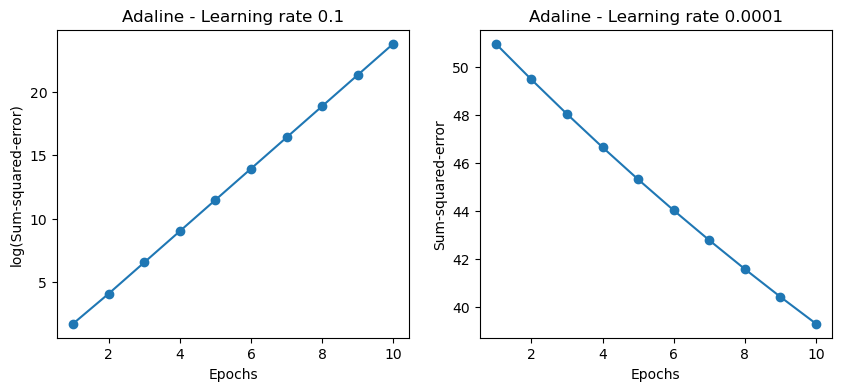

In [58]:
# Plotting cost
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

In [59]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [60]:
ada1.predict(X_std)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1])

In [61]:
ada2.predict(X_std)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1])

In [63]:
# Training AdalineGD with learning rate 0.01
ada = AdalineGD(eta=0.01)
ada.fit(X_std, y)

[0.         0.73258096 0.97492511]
[ 1.47437618e-15 -6.37284985e-02  3.74814400e-01]
[1.66533454e-17 4.23794973e-01 1.02172761e+00]
[ 1.04027897e-15 -1.01750346e-01  6.25668805e-01]
[9.65894031e-17 2.20003559e-01 1.05261615e+00]
[ 8.04911693e-16 -1.26843862e-01  7.91226751e-01]
[1.25455202e-16 8.55060696e-02 1.07300186e+00]
[ 4.67403893e-16 -1.43404986e-01  9.00491061e-01]
[ 1.42108547e-16 -3.25907753e-03  1.08645593e+00]
[ 3.55271368e-16 -1.54334935e-01  9.72602910e-01]
[ 1.23234756e-16 -6.18419653e-02  1.09533531e+00]
[ 2.55351296e-16 -1.61548441e-01  1.02019502e+00]
[ 1.65423231e-16 -1.00505279e-01  1.10119548e+00]
[ 2.56461519e-16 -1.66309184e-01  1.05160467e+00]
[ 1.79856130e-16 -1.26022147e-01  1.10506306e+00]
[ 1.82076576e-16 -1.69451161e-01  1.07233430e+00]
[ 1.05471187e-16 -1.42862674e-01  1.10761557e+00]
[ 2.28705943e-16 -1.71524791e-01  1.08601537e+00]
[ 1.44328993e-16 -1.53977021e-01  1.10930016e+00]
[ 1.65423231e-16 -1.72893337e-01  1.09504454e+00]
[ 1.65423231e-16 -1.6131

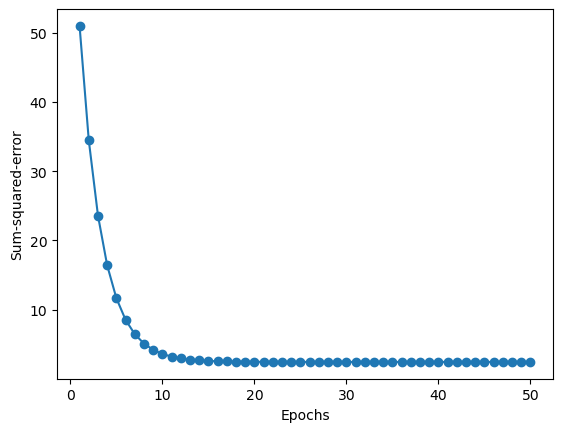

In [64]:
# Plotting cost
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

In [65]:
ada.predict(X_std)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

C:\Users\pc\AppData\Local\Temp\ipykernel_25524\53306269.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


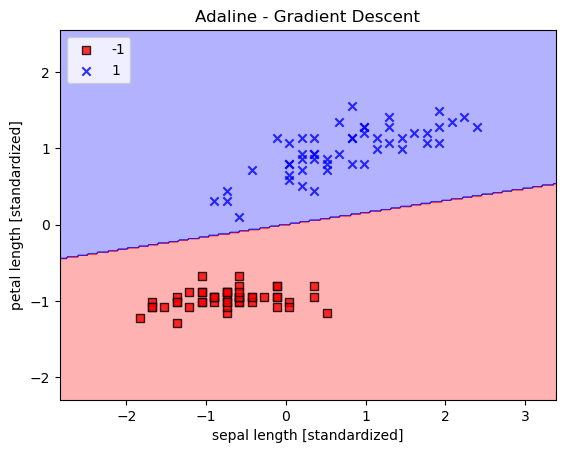

In [66]:
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

In [81]:
# Computing the accuracy of the model

y_pred = ada.predict(X_std)
accuracy = np.sum(y_pred == y) / len(y)
print("Accuracy on the training set =", accuracy)

Accuracy on the training set = 1.0


# 3. Adaline with Stochastic Gradient Descent

- Large scale machine learning and Stochastic Gradient Descent
    - (Batch) Gradient Descent
        - Run through all the samples in training set to do a single update for a parameter in a particular iteration
        - This is so inefficient when dealing with large scale dataset because in every iteration when you are updating the values of the parameters, you are running through the complete training set

    - Stochastic Gradient Descent
        - Use only 1 or subset of training sample from your training set to do the update for a parameter in a particular iteration
            - Use 1 → Stochastic Gradient Descent
            - Use subset → Mini-batch Stochastic Gradient Descent


### Define AdalineSGD Class

In [71]:
class AdalineSGD(object):
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        self._initialize_weights(X.shape[1])

    def fit(self, X, y):
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
            print(self.w_)
        return self

    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

### Training an Adaline model with SGD on the iris dataset 
- Training and visualizing a Adaline model using AdalineSGD Class

In [72]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

[0.00547304 0.27285356 0.49825661]
[-0.00608069  0.23654068  0.64462437]
[0.00926127 0.18523628 0.74504939]
[0.0015176  0.12647723 0.81131789]
[0.00386798 0.07201719 0.86046615]
[0.00740254 0.0312768  0.90627882]
[7.88472441e-03 4.13494918e-04 9.46872499e-01]
[ 0.00251789 -0.03650693  0.96815509]
[-0.00110447 -0.06194687  0.99205647]
[-0.00581369 -0.08027863  1.01350822]
[-0.00954177 -0.09770813  1.02772661]
[-0.00632273 -0.11472444  1.03770746]
[-0.00587553 -0.12175986  1.052657  ]
[-0.00632225 -0.13560041  1.05923075]
[ 2.27202773e-04 -1.38544756e-01  1.07263215e+00]


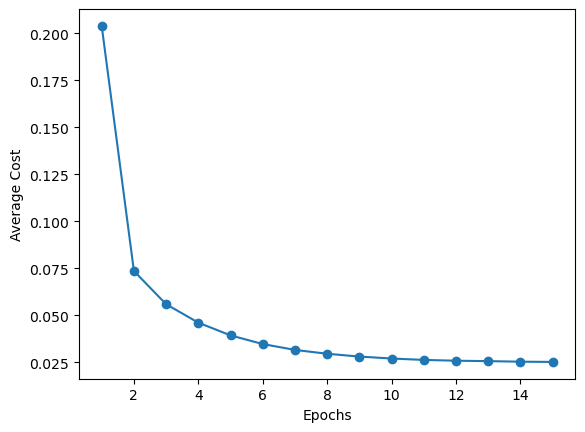

In [73]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

In [74]:
ada.predict(X_std)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

C:\Users\pc\AppData\Local\Temp\ipykernel_25524\53306269.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


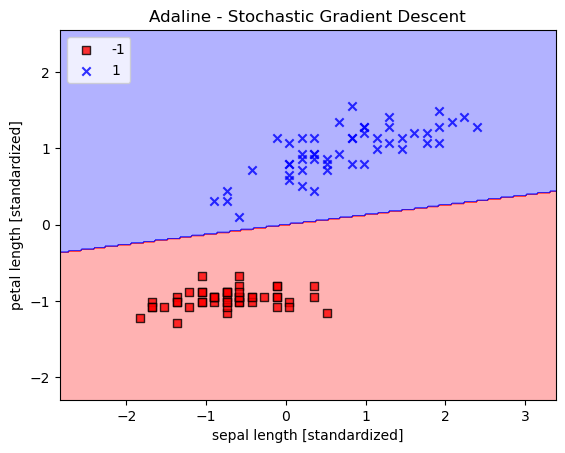

In [75]:
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()